In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/accepted_2007_to_2018Q4.csv", low_memory=False)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(620087, 151)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620087 entries, 0 to 620086
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 714.4+ MB


In [ ]:
df.isnull().sum()

,0
id,0
member_id,96192
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
...,...
settlement_status,93324
settlement_date,93324
settlement_amount,93324
settlement_percentage,93324


In [ ]:
df["loan_status"].value_counts()

,count
loan_status,
Fully Paid,342126
Current,182055
Charged Off,87702
Late (31-120 days),5298
In Grace Period,1906
Late (16-30 days),986
Default,10


In [ ]:
df_new = df[df["loan_status"] == "Charged Off"] ## We will continue our analysis on the charged off group to calculate LGD based on the recovary rate.
df_new.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
13,66624733,NaN,18000.0,18000.0,18000.0,60 months,19.48,471.70,E,E2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
25,67849662,NaN,4225.0,4225.0,4225.0,36 months,14.85,146.16,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
30,67715283,NaN,16000.0,16000.0,16000.0,36 months,12.88,538.18,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
31,68341789,NaN,24250.0,24250.0,24250.0,60 months,24.24,701.01,F,F3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
33,68415473,NaN,25000.0,25000.0,25000.0,60 months,13.99,581.58,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
display(df_new.head())
display(df_new.info())
display(df_new.shape)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
13,66624733,NaN,18000.0,18000.0,18000.0,60 months,19.48,471.70,E,E2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
25,67849662,NaN,4225.0,4225.0,4225.0,36 months,14.85,146.16,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
30,67715283,NaN,16000.0,16000.0,16000.0,36 months,12.88,538.18,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
31,68341789,NaN,24250.0,24250.0,24250.0,60 months,24.24,701.01,F,F3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
33,68415473,NaN,25000.0,25000.0,25000.0,60 months,13.99,581.58,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Index: 87702 entries, 13 to 620078
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 101.7+ MB


None

(87702, 151)

In [ ]:
missing_values_percentage = (df_new.isnull().sum() / len(df_new)) * 100
display(missing_values_percentage.sort_values(ascending=False))

,0
member_id,100.000000
next_pymnt_d,100.000000
desc,99.996579
orig_projected_additional_accrued_interest,99.157374
sec_app_mths_since_last_major_derog,99.156234
...,...
num_il_tl,0.000000
num_op_rev_tl,0.000000
hardship_flag,0.000000
disbursement_method,0.000000


In [ ]:
display(df_new.describe())

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,87702.000000,87702.000000,87702.000000,87702.000000,87702.000000,8.770200e+04,87676.000000,87702.000000,87702.000000,...,1271.0,1271.000000,1271.0,1271.000000,739.000000,1271.000000,1271.000000,12292.000000,12292.000000,12292.000000
mean,NaN,15789.315808,15789.315808,15781.660837,15.176227,459.802639,7.051538e+04,20.917357,0.369969,686.785136,...,3.0,133.464091,3.0,16.156570,375.659350,10137.808505,188.456876,5002.043425,47.474308,13.118776
std,NaN,8656.516531,8656.516531,8652.590690,4.640888,250.880963,7.513658e+04,11.085773,0.970709,25.460753,...,0.0,114.657840,0.0,8.955263,307.266801,6894.821902,189.961022,3642.625958,6.489200,7.860267
min,NaN,1000.000000,1000.000000,900.000000,5.310000,30.120000,0.000000e+00,0.000000,0.000000,660.000000,...,3.0,1.610000,3.0,0.000000,6.450000,191.120000,0.020000,107.000000,0.450000,0.000000
25%,NaN,9600.000000,9600.000000,9600.000000,12.290000,278.730000,4.320000e+04,14.120000,0.000000,670.000000,...,3.0,44.910000,3.0,10.000000,124.275000,4461.235000,45.050000,2199.410000,45.000000,6.000000
50%,NaN,14950.000000,14950.000000,14875.000000,14.650000,401.970000,6.000000e+04,20.570000,0.000000,680.000000,...,3.0,102.890000,3.0,18.000000,297.390000,8838.000000,131.220000,4256.895000,45.000000,12.000000
75%,NaN,20875.000000,20875.000000,20825.000000,17.860000,594.410000,8.500000e+04,27.430000,0.000000,700.000000,...,3.0,188.940000,3.0,24.000000,539.445000,14495.270000,278.290000,6884.602500,50.000000,18.000000
max,NaN,40000.000000,40000.000000,40000.000000,30.990000,1717.630000,9.500000e+06,999.000000,27.000000,845.000000,...,3.0,923.400000,3.0,30.000000,2032.470000,38399.000000,1283.900000,30000.000000,166.670000,112.000000


In [ ]:
categorical_cols = df_new.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f"--- Analysis for column: {col} ---")
    print(f"Number of unique values: {df_new[col].nunique()}")
    if not df_new[col].mode().empty:
        print(f"Mode: {df_new[col].mode()[0]}")
    else:
        print("Mode: No unique mode")
    print("Value Counts:")
    display(df_new[col].value_counts())
    print("\n")

--- Analysis for column: id ---
Number of unique values: 87702
Mode: 100065804
Value Counts:


,count
id,
112808998,1
66624733,1
67849662,1
67715283,1
68341789,1
...,...
68466066,1
68506862,1
68340446,1




--- Analysis for column: term ---
Number of unique values: 2
Mode:  36 months
Value Counts:


,count
term,
36 months,49637
60 months,38065




--- Analysis for column: grade ---
Number of unique values: 7
Mode: C
Value Counts:


,count
grade,
C,27607
D,20086
B,16209
E,13200
A,4639
F,4575
G,1386




--- Analysis for column: sub_grade ---
Number of unique values: 35
Mode: C4
Value Counts:


,count
sub_grade,
C4,6218
C3,5599
C2,5422
C5,5289
C1,5079
D1,4573
D2,4157
B5,4059
D4,3895




--- Analysis for column: emp_title ---
Number of unique values: 33301
Mode: Manager
Value Counts:


,count
emp_title,
Manager,1400
Teacher,1395
Owner,997
Driver,686
Supervisor,659
...,...
Supervisor of hospital billing,1
Clinical Education Manager,1
Mech,1




--- Analysis for column: emp_length ---
Number of unique values: 11
Mode: 10+ years
Value Counts:


,count
emp_length,
10+ years,27101
2 years,7775
< 1 year,7507
3 years,7014
1 year,6028
5 years,5224
4 years,5197
8 years,4329
7 years,3754




--- Analysis for column: home_ownership ---
Number of unique values: 4
Mode: RENT
Value Counts:


,count
home_ownership,
RENT,40959
MORTGAGE,36784
OWN,9958
ANY,1




--- Analysis for column: verification_status ---
Number of unique values: 3
Mode: Source Verified
Value Counts:


,count
verification_status,
Source Verified,38574
Verified,31225
Not Verified,17903




--- Analysis for column: issue_d ---
Number of unique values: 18
Mode: Jul-2015
Value Counts:


,count
issue_d,
Jul-2015,8300
Oct-2015,8188
Dec-2015,8136
Nov-2015,6540
Apr-2015,6509
Jan-2015,6458
Aug-2015,6339
May-2015,5882
Jun-2015,5294




--- Analysis for column: loan_status ---
Number of unique values: 1
Mode: Charged Off
Value Counts:


,count
loan_status,
Charged Off,87702




--- Analysis for column: pymnt_plan ---
Number of unique values: 1
Mode: n
Value Counts:


,count
pymnt_plan,
n,87702




--- Analysis for column: url ---
Number of unique values: 87702
Mode: https://lendingclub.com/browse/loanDetail.action?loan_id=100065804
Value Counts:


,count
url,
https://lendingclub.com/browse/loanDetail.action?loan_id=112808998,1
https://lendingclub.com/browse/loanDetail.action?loan_id=66624733,1
https://lendingclub.com/browse/loanDetail.action?loan_id=67849662,1
https://lendingclub.com/browse/loanDetail.action?loan_id=67715283,1
https://lendingclub.com/browse/loanDetail.action?loan_id=68341789,1
...,...
https://lendingclub.com/browse/loanDetail.action?loan_id=68466066,1
https://lendingclub.com/browse/loanDetail.action?loan_id=68506862,1
https://lendingclub.com/browse/loanDetail.action?loan_id=68340446,1




--- Analysis for column: desc ---
Number of unique values: 3
Mode:  
Value Counts:


,count
desc,
,1
I am a great candidate for this loan because I have not missed a beat on any thing in five years. Thanks,1
"I need funds to cover the uncovered prescription drugs that I need for my wife. We have medical insurance but the infamous Medicare doughnut hole has bitten us. For those unaccostumed to the doughnut hole it is when you hit a certain limit, say 2500.00 then until you pay our approx. 45oo.oo, you incurr all the costs of the medicene.",1




--- Analysis for column: purpose ---
Number of unique values: 13
Mode: debt_consolidation
Value Counts:


,count
purpose,
debt_consolidation,54873
credit_card,17040
home_improvement,4903
other,4815
major_purchase,1649
small_business,1090
medical,1021
moving,676
car,616




--- Analysis for column: title ---
Number of unique values: 14
Mode: Debt consolidation
Value Counts:


,count
title,
Debt consolidation,54855
Credit card refinancing,17056
Home improvement,4901
Other,4809
Major purchase,1647
Business,1086
Medical expenses,1020
Moving and relocation,678
Car financing,616




--- Analysis for column: zip_code ---
Number of unique values: 874
Mode: 112xx
Value Counts:


,count
zip_code,
112xx,960
750xx,861
945xx,846
331xx,813
891xx,811
...,...
522xx,1
096xx,1
962xx,1




--- Analysis for column: addr_state ---
Number of unique values: 50
Mode: CA
Value Counts:


,count
addr_state,
CA,12288
NY,7884
TX,7247
FL,6570
NJ,3282
PA,3140
OH,3083
IL,3029
GA,2617




--- Analysis for column: earliest_cr_line ---
Number of unique values: 652
Mode: Aug-2002
Value Counts:


,count
earliest_cr_line,
Aug-2002,678
Sep-2004,674
Aug-2001,672
Sep-2003,669
Aug-2004,624
...,...
Jan-1956,1
Feb-1967,1
Jan-1951,1




--- Analysis for column: initial_list_status ---
Number of unique values: 2
Mode: w
Value Counts:


,count
initial_list_status,
w,54400
f,33302




--- Analysis for column: last_pymnt_d ---
Number of unique values: 50
Mode: Sep-2016
Value Counts:


,count
last_pymnt_d,
Sep-2016,3193
Jul-2016,3117
Aug-2016,3084
Jun-2016,3063
Oct-2016,2882
Mar-2017,2749
May-2016,2704
Jan-2017,2585
Mar-2016,2538




--- Analysis for column: next_pymnt_d ---
Number of unique values: 0
Mode: No unique mode
Value Counts:


,count
next_pymnt_d,




--- Analysis for column: last_credit_pull_d ---
Number of unique values: 51
Mode: Mar-2019
Value Counts:


,count
last_credit_pull_d,
Mar-2019,19445
Oct-2016,8085
Feb-2017,6555
Jul-2018,5800
Aug-2018,4570
Feb-2019,3862
Oct-2018,3200
Oct-2017,3113
Jun-2017,2809




--- Analysis for column: application_type ---
Number of unique values: 2
Mode: Individual
Value Counts:


,count
application_type,
Individual,85921
Joint App,1781




--- Analysis for column: verification_status_joint ---
Number of unique values: 3
Mode: Not Verified
Value Counts:


,count
verification_status_joint,
Not Verified,738
Source Verified,577
Verified,463




--- Analysis for column: sec_app_earliest_cr_line ---
Number of unique values: 373
Mode: Aug-2007
Value Counts:


,count
sec_app_earliest_cr_line,
Aug-2007,18
Mar-2006,18
Jul-2004,17
Aug-2006,17
May-2007,16
...,...
Sep-2012,1
Jan-1984,1
Sep-1982,1




--- Analysis for column: hardship_flag ---
Number of unique values: 1
Mode: N
Value Counts:


,count
hardship_flag,
N,87702




--- Analysis for column: hardship_type ---
Number of unique values: 1
Mode: INTEREST ONLY-3 MONTHS DEFERRAL
Value Counts:


,count
hardship_type,
INTEREST ONLY-3 MONTHS DEFERRAL,1271




--- Analysis for column: hardship_reason ---
Number of unique values: 9
Mode: UNEMPLOYMENT
Value Counts:


,count
hardship_reason,
UNEMPLOYMENT,277
EXCESSIVE_OBLIGATIONS,261
NATURAL_DISASTER,205
INCOME_CURTAILMENT,182
MEDICAL,179
REDUCED_HOURS,96
DIVORCE,33
DISABILITY,23
FAMILY_DEATH,15




--- Analysis for column: hardship_status ---
Number of unique values: 2
Mode: COMPLETED
Value Counts:


,count
hardship_status,
COMPLETED,739
BROKEN,532




--- Analysis for column: hardship_start_date ---
Number of unique values: 22
Mode: Sep-2017
Value Counts:


,count
hardship_start_date,
Sep-2017,214
Oct-2017,166
May-2017,115
Jun-2017,111
Jul-2017,95
Nov-2017,91
Aug-2017,74
Dec-2017,57
Jan-2018,47




--- Analysis for column: hardship_end_date ---
Number of unique values: 24
Mode: Dec-2017
Value Counts:


,count
hardship_end_date,
Dec-2017,194
Nov-2017,129
Aug-2017,121
Jan-2018,121
Sep-2017,107
Oct-2017,92
Feb-2018,64
Mar-2018,59
Jul-2017,53




--- Analysis for column: payment_plan_start_date ---
Number of unique values: 22
Mode: Oct-2017
Value Counts:


,count
payment_plan_start_date,
Oct-2017,189
Sep-2017,161
Nov-2017,123
Jun-2017,121
Jul-2017,107
Aug-2017,72
May-2017,66
Dec-2017,62
Jan-2018,53




--- Analysis for column: hardship_loan_status ---
Number of unique values: 5
Mode: Late (16-30 days)
Value Counts:


,count
hardship_loan_status,
Late (16-30 days),681
In Grace Period,342
Current,182
Late (31-120 days),63
Issued,3




--- Analysis for column: disbursement_method ---
Number of unique values: 2
Mode: Cash
Value Counts:


,count
disbursement_method,
Cash,87546
DirectPay,156




--- Analysis for column: debt_settlement_flag ---
Number of unique values: 2
Mode: N
Value Counts:


,count
debt_settlement_flag,
N,75410
Y,12292




--- Analysis for column: debt_settlement_flag_date ---
Number of unique values: 44
Mode: Oct-2018
Value Counts:


,count
debt_settlement_flag_date,
Oct-2018,854
Jan-2019,786
Nov-2018,778
Dec-2018,772
Feb-2019,768
Aug-2018,757
Jun-2018,719
Mar-2019,698
Jul-2018,634




--- Analysis for column: settlement_status ---
Number of unique values: 3
Mode: COMPLETE
Value Counts:


,count
settlement_status,
COMPLETE,6076
ACTIVE,4289
BROKEN,1927




--- Analysis for column: settlement_date ---
Number of unique values: 47
Mode: Mar-2018
Value Counts:


,count
settlement_date,
Mar-2018,640
Nov-2017,615
Oct-2017,613
Jan-2018,599
Feb-2018,574
Apr-2018,522
Sep-2017,519
Dec-2017,519
May-2018,514


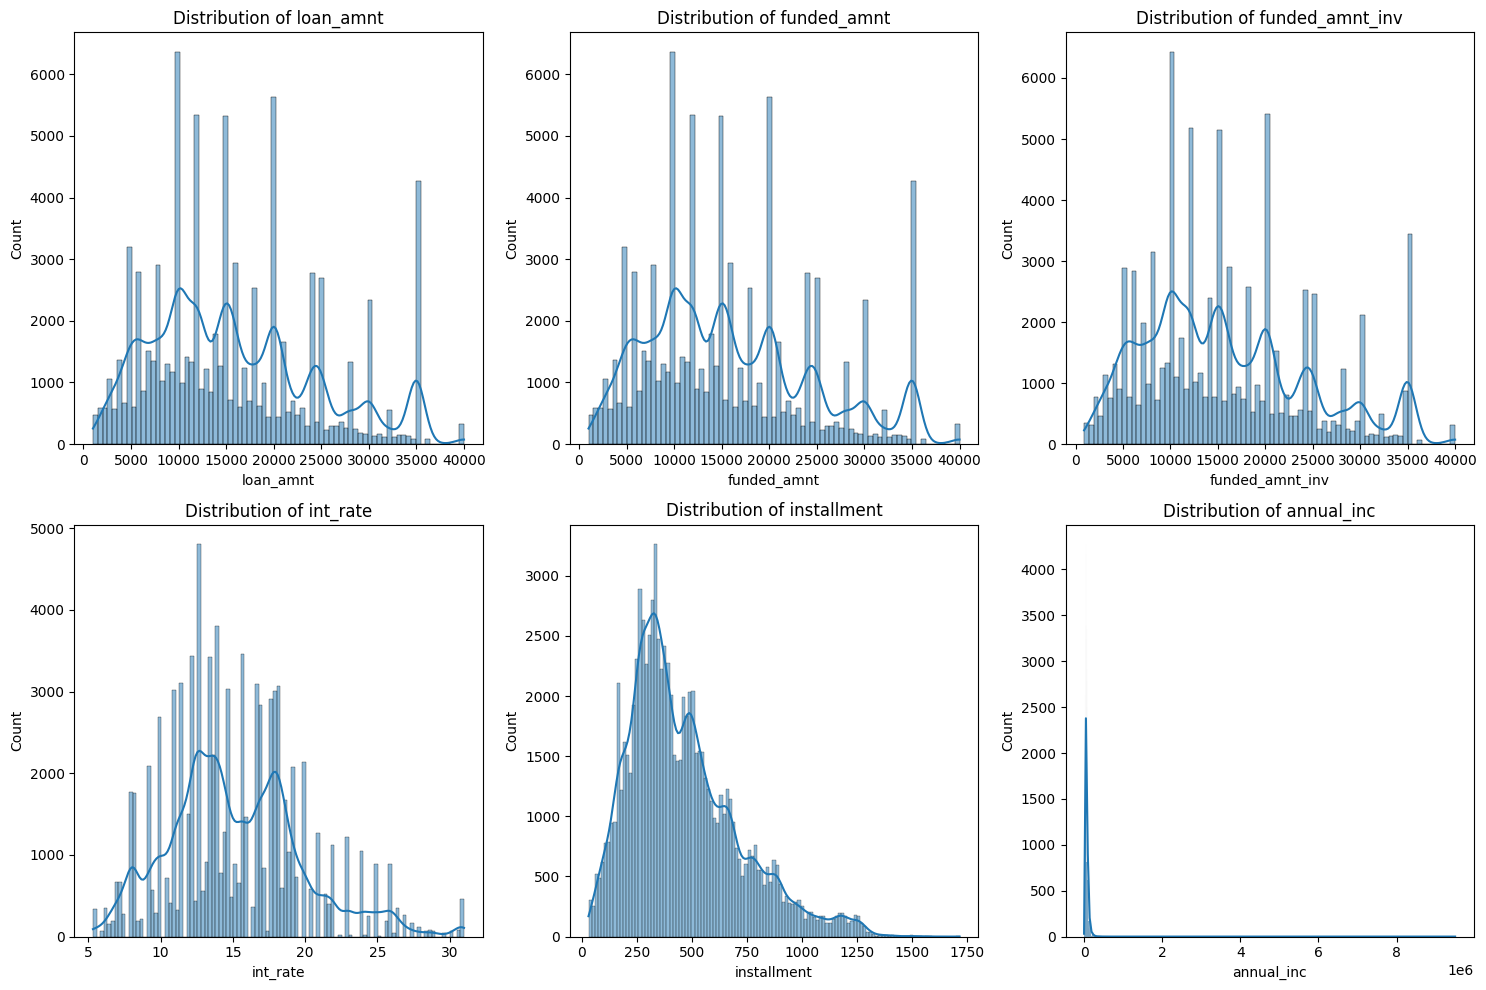

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_new[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

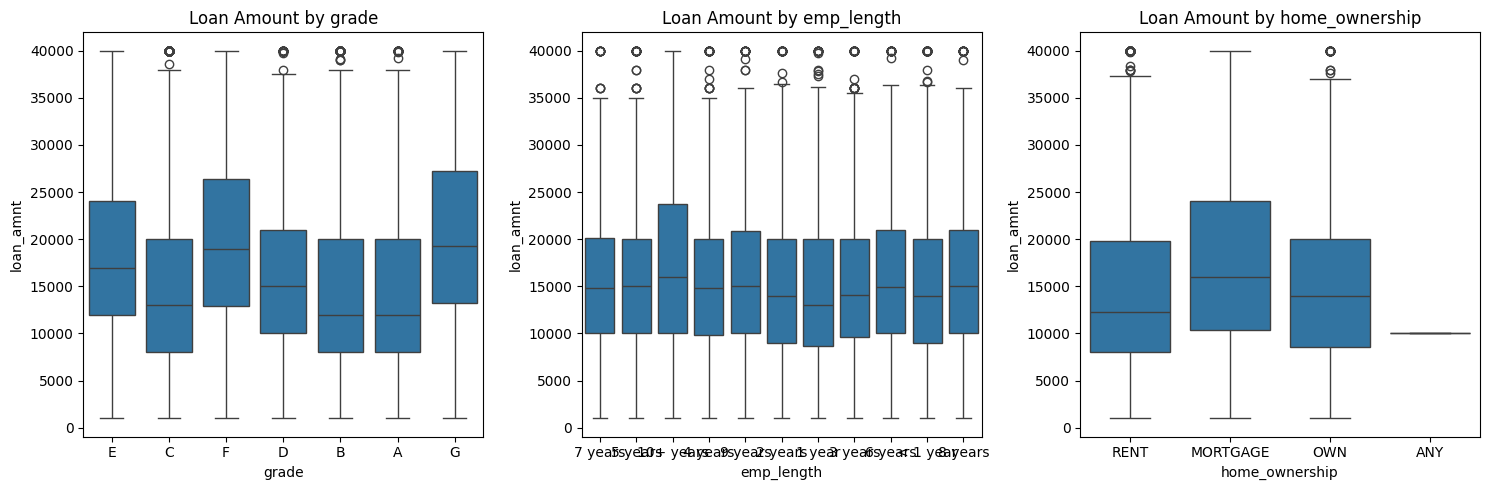

In [ ]:
categorical_cols_for_boxplot = ['grade', 'emp_length', 'home_ownership']

plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols_for_boxplot):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=col, y='loan_amnt', data=df_new)
    plt.title(f'Loan Amount by {col}')
plt.tight_layout()
plt.show()

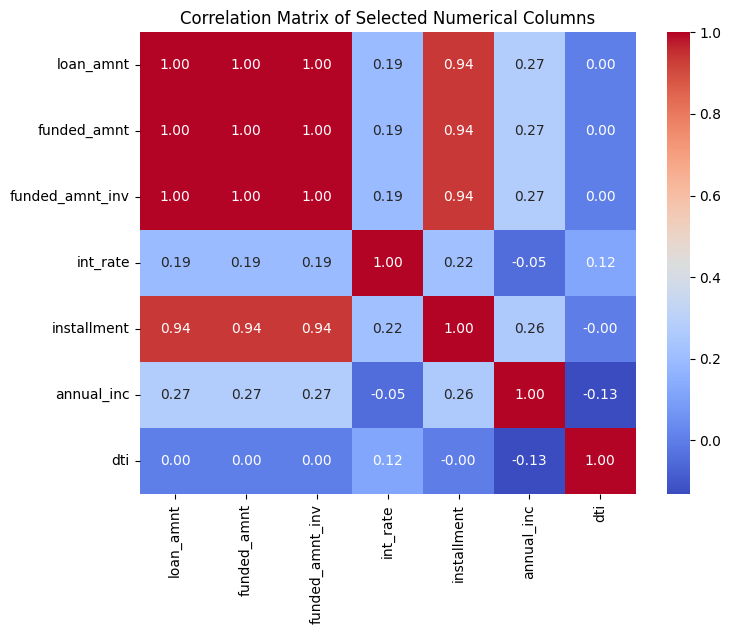

In [ ]:
correlation_cols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti']
corr_matrix = df_new[correlation_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Numerical Columns')
plt.show()

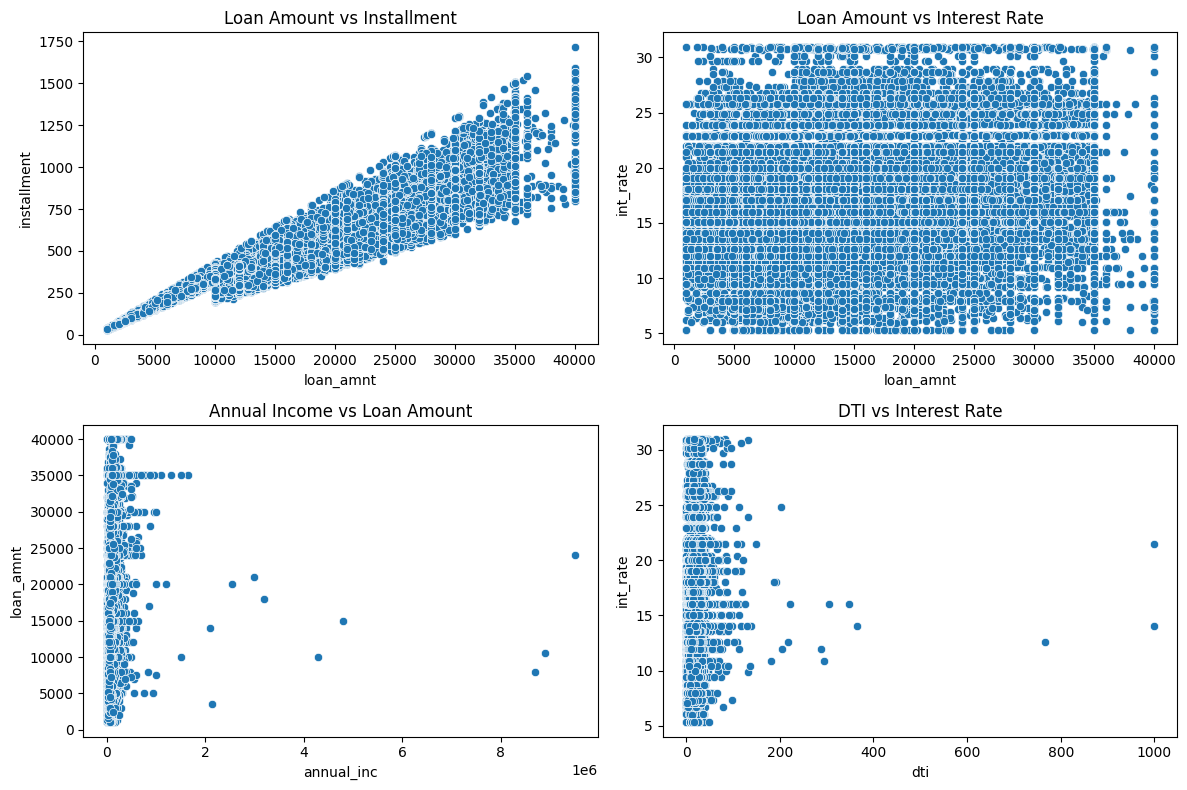

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(x='loan_amnt', y='installment', data=df_new)
plt.title('Loan Amount vs Installment')

plt.subplot(2, 2, 2)
sns.scatterplot(x='loan_amnt', y='int_rate', data=df_new)
plt.title('Loan Amount vs Interest Rate')

plt.subplot(2, 2, 3)
sns.scatterplot(x='annual_inc', y='loan_amnt', data=df_new)
plt.title('Annual Income vs Loan Amount')

plt.subplot(2, 2, 4)
sns.scatterplot(x='dti', y='int_rate', data=df_new)
plt.title('DTI vs Interest Rate')

plt.tight_layout()
plt.show()

In [ ]:
# 1. Create payment_to_loan_ratio
df_new["payment_to_loan_ratio"] = df_new["total_pymnt"] / df_new["loan_amnt"]

# 2. Create recovery_to_loan_ratio
df_new["recovery_to_loan_ratio"] = df_new["recoveries"] / df_new["loan_amnt"]

# 3. Convert date columns to datetime objects, handling potential errors
df_new["issue_d"] = pd.to_datetime(df_new["issue_d"], errors='coerce', format='%b-%Y')
df_new["last_pymnt_d"] = pd.to_datetime(df_new["last_pymnt_d"], errors='coerce', format='%b-%Y')

# 4. Calculate months since last payment, handling missing dates
# Calculate the difference in days, then convert to months (approximate)
time_diff_days = (df_new["last_pymnt_d"] - df_new["issue_d"]).dt.days
df_new["months_since_last_payment"] = time_diff_days / 30.44  # Approximate average days in a month

# Handle cases where issue_d is after last_pymnt_d or either is NaT
df_new.loc[df_new["months_since_last_payment"] < 0, "months_since_last_payment"] = 0
df_new.loc[df_new["months_since_last_payment"].isnull(), "months_since_last_payment"] = -1 # Use -1 to indicate missing/unknown

# 5. Create binary feature for settlement
df_new["had_settlement"] = np.where(df_new["settlement_status"].notna(), 1, 0)

# 6. Display the head of the DataFrame with the new features
display(df_new[["loan_amnt", "total_pymnt", "recoveries", "issue_d", "last_pymnt_d", "settlement_status",
                "payment_to_loan_ratio", "recovery_to_loan_ratio", "months_since_last_payment", "had_settlement"]].head())

/tmp/ipython-input-892400497.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["payment_to_loan_ratio"] = df_new["total_pymnt"] / df_new["loan_amnt"]
/tmp/ipython-input-892400497.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["recovery_to_loan_ratio"] = df_new["recoveries"] / df_new["loan_amnt"]
/tmp/ipython-input-892400497.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

,loan_amnt,total_pymnt,recoveries,issue_d,last_pymnt_d,settlement_status,payment_to_loan_ratio,recovery_to_loan_ratio,months_since_last_payment,had_settlement
13,18000.0,9452.74,1618.90,2015-12-01,2017-05-01,NaN,0.525152,0.089939,16.984231,0
25,4225.0,2558.87,368.37,2015-12-01,2017-04-01,NaN,0.605650,0.087188,15.998686,0
30,16000.0,17396.63,0.00,2015-12-01,2018-11-01,NaN,1.087289,0.000000,35.019711,0
31,24250.0,4124.42,0.00,2015-12-01,2016-07-01,NaN,0.170079,0.000000,6.997372,0
33,25000.0,14490.92,0.00,2015-12-01,2018-02-01,NaN,0.579637,0.000000,26.051248,0


In [ ]:
df_new["recovery_rate"] = df_new["total_pymnt"] / df_new["loan_amnt"]
df_new["recovery_rate"].head()

/tmp/ipython-input-3465394365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["recovery_rate"] = df_new["total_pymnt"] / df_new["loan_amnt"]


,recovery_rate
13,0.525152
25,0.605650
30,1.087289
31,0.170079
33,0.579637


In [ ]:
df["recovery_rate"] = df["total_pymnt"] / df["loan_amnt"]
df["recovery_rate"].head()

,recovery_rate
0,1.228257
1,1.039662
2,1.135296
3,0.898972
4,1.128894


In [ ]:
df["recovery_rate"].mean()

np.float64(0.8961973255554782)

In [ ]:
df_new[["recovery_rate"]].mean() ### This is for charged off group.

,0
recovery_rate,0.548491


As we can see recovery rate between general population and "charged off" group is highly significant.
LGD = 1 - Recovary rate(0.58), thus LGD is 0.42.


In [ ]:
df_new["LGD"] = 1 - df_new["recovery_rate"]
df_new["LGD"].head()

/tmp/ipython-input-1000383855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["LGD"] = 1 - df_new["recovery_rate"]


,LGD
13,0.474848
25,0.394350
30,-0.087289
31,0.829921
33,0.420363


In [ ]:
display(df_new.head())
df_new.shape

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,settlement_term,payment_to_loan_ratio,recovery_to_loan_ratio,months_since_last_payment,had_settlement,dti_risk_group,pub_rec_risk_group,open_acc_risk_group,recovery_rate,LGD
13,66624733,NaN,18000.0,18000.0,18000.0,60 months,19.48,471.70,E,E2,...,NaN,0.525152,0.089939,16.984231,0,low_risk,high,very high,0.525152,0.474848
25,67849662,NaN,4225.0,4225.0,4225.0,36 months,14.85,146.16,C,C5,...,NaN,0.605650,0.087188,15.998686,0,medium,low,high,0.605650,0.394350
30,67715283,NaN,16000.0,16000.0,16000.0,36 months,12.88,538.18,C,C2,...,NaN,1.087289,0.000000,35.019711,0,medium,high,high,1.087289,-0.087289
31,68341789,NaN,24250.0,24250.0,24250.0,60 months,24.24,701.01,F,F3,...,NaN,0.170079,0.000000,6.997372,0,high,low,very high,0.170079,0.829921
33,68415473,NaN,25000.0,25000.0,25000.0,60 months,13.99,581.58,C,C4,...,NaN,0.579637,0.000000,26.051248,0,so high,low,very high,0.579637,0.420363


(87676, 160)

In [ ]:
# Select numerical features based on previous analysis and domain knowledge
selected_numeric_cols = ["loan_amnt", "int_rate", "annual_inc", "payment_to_loan_ratio", "recovery_to_loan_ratio", "months_since_last_payment"]

# Select categorical features based on previous analysis and domain knowledge
selected_categorical_cols = ["dti_risk_group", "open_acc_risk_group", "pub_rec_risk_group", "grade", "term", "home_ownership", "purpose", "had_settlement"]

# Display the selected features
print("Selected Numerical Features:")
print(selected_numeric_cols)
print("\nSelected Categorical Features:")
print(selected_categorical_cols)

Selected Numerical Features:
['loan_amnt', 'int_rate', 'annual_inc', 'payment_to_loan_ratio', 'recovery_to_loan_ratio', 'months_since_last_payment']

Selected Categorical Features:
['dti_risk_group', 'open_acc_risk_group', 'pub_rec_risk_group', 'grade', 'term', 'home_ownership', 'purpose', 'had_settlement']


### Lets assume that A has %1 risk, B has 2, C has 3, D has 5, E has 8, F is 10, G has 20

In [65]:
risk_coefficients = {
    'A': 0.01,
    'B': 0.02,
    'C': 0.03,
    'D': 0.05,
    'E': 0.08,
    'F': 0.10,
    'G': 0.20
}

In [66]:
df_new["risk_coefficient"] = df_new["grade"].map(risk_coefficients)
df_new[["grade", "risk_coefficient"]].head()

/tmp/ipython-input-1995343077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["risk_coefficient"] = df_new["grade"].map(risk_coefficients)


,grade,risk_coefficient
13,E,0.08
25,C,0.03
30,C,0.03
31,F,0.10
33,C,0.03


In [67]:
df_new["weighted_loan_amount"] = df_new["loan_amnt"] * df_new["risk_coefficient"]
df_new.head()

/tmp/ipython-input-76951897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["weighted_loan_amount"] = df_new["loan_amnt"] * df_new["risk_coefficient"]


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recovery_to_loan_ratio,months_since_last_payment,had_settlement,dti_risk_group,pub_rec_risk_group,open_acc_risk_group,recovery_rate,LGD,risk_coefficient,weighted_loan_amount
13,66624733,NaN,18000.0,18000.0,18000.0,60 months,19.48,471.70,E,E2,...,0.089939,16.984231,0,low_risk,high,very high,0.525152,0.474848,0.08,1440.00
25,67849662,NaN,4225.0,4225.0,4225.0,36 months,14.85,146.16,C,C5,...,0.087188,15.998686,0,medium,low,high,0.605650,0.394350,0.03,126.75
30,67715283,NaN,16000.0,16000.0,16000.0,36 months,12.88,538.18,C,C2,...,0.000000,35.019711,0,medium,high,high,1.087289,-0.087289,0.03,480.00
31,68341789,NaN,24250.0,24250.0,24250.0,60 months,24.24,701.01,F,F3,...,0.000000,6.997372,0,high,low,very high,0.170079,0.829921,0.10,2425.00
33,68415473,NaN,25000.0,25000.0,25000.0,60 months,13.99,581.58,C,C4,...,0.000000,26.051248,0,so high,low,very high,0.579637,0.420363,0.03,750.00


In [68]:
total_risk_per_grade = df_new.groupby("grade")["weighted_loan_amount"].sum()
print(total_risk_per_grade)

grade
A      661640.25
B     4570804.50
C    12206267.25
D    16143332.50
E    19235502.00
F     9117540.00
G     5635255.00
Name: weighted_loan_amount, dtype: float64


In [69]:
total__risk = total_risk_per_grade.sum()
print(f"The total amount of risk is: {total__risk:,.2f}")

The total amount of risk is: 67,570,341.50


In [70]:
formatted_total_risk = f"{total__risk:,.2f}"
print(formatted_total_risk)

67,570,341.50


In [71]:
total_amount = df_new["loan_amnt"].sum()
total_amount

np.float64(1384241925.0)

In [72]:
formatted_total_amount = f"{total_amount:,.2f}"
print(formatted_total_amount)

1,384,241,925.00


In [75]:
Risk_percatage_of_portfolio = (total__risk / total_amount) * 100
print(f"The total risk of all portfolio is %: {Risk_percatage_of_portfolio:,.2f}")

The total risk of all portfolio is %: 4.88


### For the sake of this project(Calculating LGD) we didn't estimate the expected loss instead we assigned different coefficients for different grades. Thus we are estiamated portfolio risk based on assumed numbers and this led us to calculate the portfolio risk around 4.88.